In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from diffpy.pdfgui.tui import LoadProject
from diffpy.pdfgui.control.pdfguicontrol import PDFGuiControl

In [2]:
%matplotlib widget

## Load a pre-defined PDFGui project file (.ddp) using diffpy.pdfgui.tui.LoadProject

In [3]:
fn = '/Users/cheng-hunglin/Documents/Data_LDRD/Cs_x-Pb_y-B_z.ddp'
ddp = LoadProject(fn)

## Check the fitting object (diffpy.pdfgui.control.fitting.Fitting) in the ddp project file

In [4]:
fit_05 = ddp.getFits()[5]
fit_05.name

'Fit 3 _3D_copy'

In [5]:
fit_05.owner

## Create an object of PDFGuiControl which holds all the data GUI needs to access or change

### the PDFGuiControl object will be saved as a ddp file in the end

In [6]:
new_guicontrol = PDFGuiControl()

## Copy the Fitting object from ddp to the new PDFGuiControl

In [7]:
new_guicontrol.add(fit_05.copy())

In [8]:
# dir(new_guicontrol)

## Using PDFGuiControl.fits to check the added Fitting object in the the new PDFGuiControl

In [9]:
new_guicontrol.fits

## Find the gr data list and sort it

In [10]:
subpath = '/Users/cheng-hunglin/Documents/Data_LDRD'
gr_dir = os.path.join(subpath, 'gr_data')
gr_list = glob.glob(gr_dir + '/*.gr')
gr_list.sort()

In [11]:
gr_serial = gr_list[:]

## Define fitrmax, fitrmin, qdamp, qbroad from the copied Fitting object, e.g., fit_05.copy()

In [12]:
fitrmax = new_guicontrol.fits[0].datasets[0].fitrmax
fitrmin = new_guicontrol.fits[0].datasets[0].fitrmin
qdamp = new_guicontrol.fits[0].datasets[0].qdamp
qbroad = new_guicontrol.fits[0].datasets[0].qbroad
# new_guicontrol.fits[0].datasets[1].constraints.update(new_guicontrol.fits[0].datasets[0].constraints)

## Make the fitting tree in the new PDFGuiControl

In [13]:
for i in range(len(gr_serial)):

    ## Add new Fitting by copying the existed Fitting object
    new_guicontrol.add(fit_05.copy())

    ## Rename the copied Fitting object
    new_guicontrol.fits[i+1].name = f'Fit 3 _3D_s{i:02d}'

    ## Load gr data from gr_list to the newly copied Fittinmg object
    new_guicontrol.loadDataset(new_guicontrol.fits[i+1], gr_list[i])

    ## Delete the old dataset in the newly copied Fittinmg object  
    new_guicontrol.fits[i+1].datasets.__delitem__(0)

    ## Update fitrmax, fitrmin, qdamp, qbroad in the loaded dataset
    new_guicontrol.fits[i+1].datasets[0].fitrmax = fitrmax
    new_guicontrol.fits[i+1].datasets[0].fitrmin = fitrmin
    new_guicontrol.fits[i+1].datasets[0].qdamp = qdamp
    new_guicontrol.fits[i+1].datasets[0].qbroad = qbroad

    ## Update the constraints for the loaded dataset, mainly for dscale, qdamp, qbroad if constrained
    new_guicontrol.fits[i+1].datasets[0].constraints.update(new_guicontrol.fits[0].datasets[0].constraints)
    

In [14]:
new_guicontrol.fits

In [15]:
type(new_guicontrol.fits[0].datasets)

diffpy.pdfgui.control.pdflist.PDFList

In [16]:
new_guicontrol.fits[0].datasets[0].constraints

{'dscale': <diffpy.pdfgui.control.constraint.Constraint at 0x13a122030>}

## Run all the fitting in the new PDFGuiControl

In [17]:
## The total # of Fitting object in the new PDFGuiControl will be len(gr_list) + 1
## because of the first one is from the pre-defined ddp and has no modification 
for i in range(len(gr_serial)+1):
    new_guicontrol.fits[i].run()


******************************************************************************
*                      P D F F I T   Version   1.5.1                         *
*                                              2025-02-07                    *
* -------------------------------------------------------------------------- *
* (c) 1998-2007 Trustees of the Michigan State University.                   *
* (c) 2008-2025 Trustees of the Columbia University                          *
*               in the city of New York.                                     *
*                                                                            *
* Authors:                                                                   *
*     Thomas Proffen        -   Email: tproffen@lanl.gov                     *
*     Jacques Bloch         -   Email: bloch@pa.msu.edu                      *
*     Christopher Farrow    -   Email: clf2121@columbia.edu                  *
*     Pavol Juhas           -   Email: pjuhas@bnl.g

## Save the new PDFGuiControl as a ddp file

In [18]:
subpath = '/Users/cheng-hunglin/Documents/Data_LDRD'
fn = 'Cs_x-Pb_y-B_z_serial_all.ddp'
full_fn = os.path.join(subpath, fn)

new_guicontrol.save(projfile=full_fn)

## Plot rw for all fittins

In [19]:
rw_list = []
for i in range(len(gr_serial)+1):
    rw = new_guicontrol.fits[i].getData('rw')
    rw_list.append(rw)

In [20]:
len(rw_list)

85

In [24]:
idx = np.arange(-1, 84, 1)

In [25]:
idx.shape

(85,)

Text(0, 0.5, 'rw')

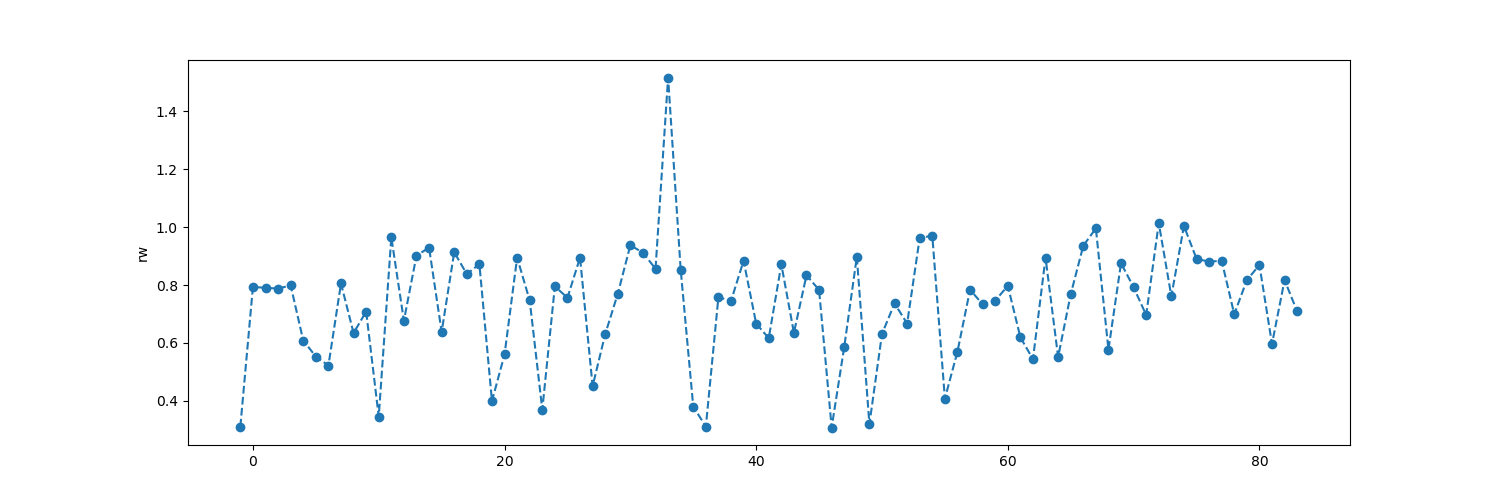

In [33]:
f = plt.figure(figsize=(15,5))
ax = f.gca()
ax.plot(idx, rw_list, 'o--')
ax.set_ylabel('rw')